In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import *

In [3]:
df = pd.read_csv('no_shows_cleaned.csv')

In [4]:
df.head(10)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0
5,F,76,0,1,0,0,0,0,0
6,F,23,0,0,0,0,0,0,1
7,F,39,0,0,0,0,0,0,1
8,F,21,0,0,0,0,0,0,0
9,F,19,0,0,0,0,0,0,0


In [5]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110502.000000,110502.000000,110502.000000,110502.000000,110502.000000,110502.000000,110502.000000,110502.000000
mean,37.094596,0.098224,0.197291,0.071881,0.030189,0.020280,0.321035,0.201870
std,23.109590,0.297619,0.397955,0.258292,0.171109,0.140958,0.466876,0.401397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Histogram - Shows distribution of data for each feature

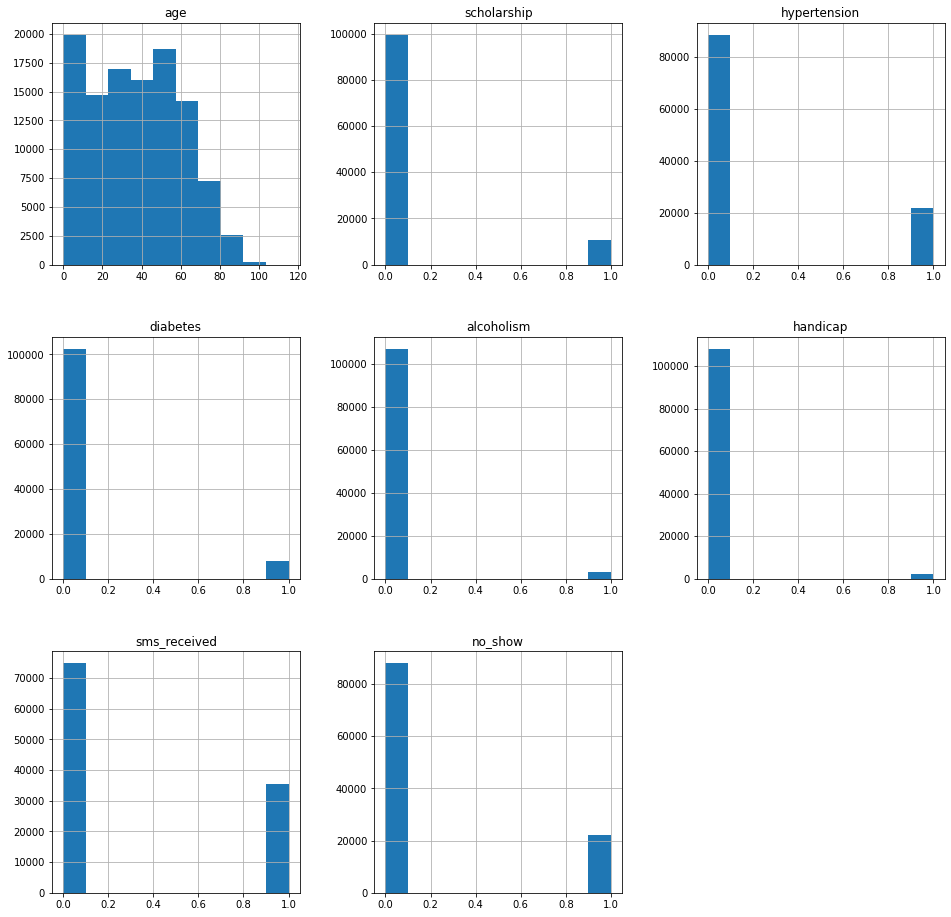

In [9]:
df.hist(figsize=(16,16));

Percentage of patients that showed up vs. didn't

<function matplotlib.pyplot.show(close=None, block=None)>

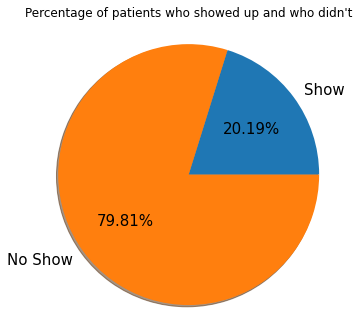

In [7]:
label_Names = ["Show", "No Show"]
data = [df.query('no_show == 1').count()[1], df.query('no_show == 0').count()[0]]
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names, autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.2);
plt.show

Does alcoholism affect showing up?

In [10]:
df.alcoholism.value_counts()[1]

3336

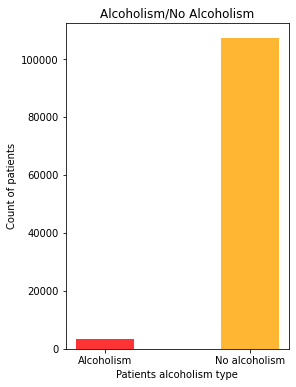

In [8]:
x_axis = ['Alcoholism' , 'No alcoholism']
alcoholism = df.alcoholism.value_counts()[1]
no_alcoholism = df.alcoholism.value_counts()[0]
y_axis = [alcoholism , no_alcoholism]
colors = ['red' , 'orange']
plt.figure(figsize=(4,6),)
plt.bar(x_axis,y_axis, color = colors, width = 0.4,alpha = 0.8 , )
plt.ylabel('Count of patients')
plt.xlabel('Patients alcoholism type')
plt.title('Alcoholism/No Alcoholism');

It is clear that the number of patients that do not have alcoholism is far greater than the number of patients who do have alcoholism, so we will look at the percentages of showing up for each group and not the total number of showups of each group to avoid bias.

In [9]:
#grouping
alcoholism_report = df.groupby(['alcoholism', 'no_show']).no_show.count()
alcoholism_report

alcoholism  no_show
0           0          85524
            1          21642
1           0           2671
            1            665
Name: no_show, dtype: int64

In [10]:
#calculating the percentage
alcoholism_percent = alcoholism_report[1][1] / alcoholism_report[1].sum()
no_alcoholism_percent = alcoholism_report[0][0] / alcoholism_report[0].sum()

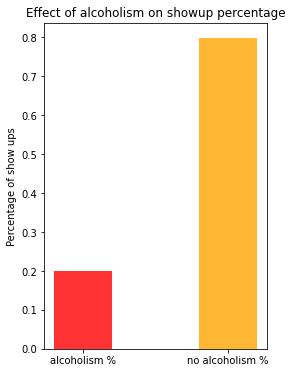

In [11]:
#plotting to explore
x_axis = ['alcoholism %' , 'no alcoholism %']
y_axis = [alcoholism_percent, no_alcoholism_percent]
colors = ['red' , 'orange']
plt.figure(figsize=(4,6),)
plt.bar(x_axis,y_axis, color = colors, width = 0.4,alpha = 0.8 , )
plt.ylabel('Percentage of show ups')
plt.title('Effect of alcoholism on showup percentage');

It is clear that alcoholism does effect whether the patient will show up or not. The patients with no alcoholism had a larger percentage of show ups.

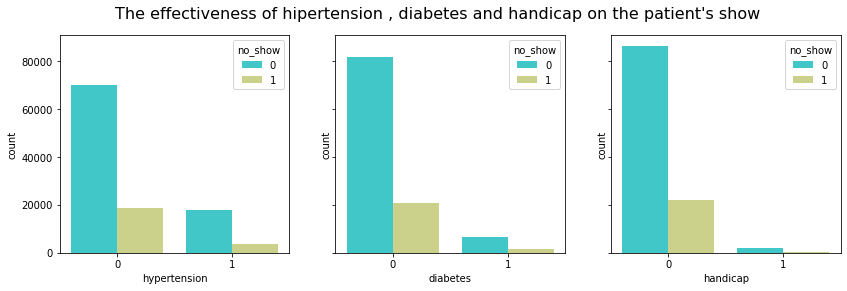

In [13]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='hypertension', data=df, hue='no_show', ax=ax1, palette='rainbow')
sns.countplot(x='diabetes', data=df, hue='no_show', ax=ax2, palette='rainbow')
sns.countplot(x='handicap', data=df, hue='no_show', ax=ax3, palette='rainbow')
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The effectiveness of hipertension , diabetes and handicap on the patient's show", fontsize=16);